# Part II - FordGoBikes - Who Are the Users? & What are their behaviors?

## by Sofia Schlamp

## Investigation Overview

To better understand the bike users and their behaviors, a dataset consisting of bike rides using the FordGoBIkes sharing system was analyzed. This data could help for marketing (e.g., which audience to target), and for logistic (e.g., where to supply bikes) purposes.

## Dataset Overview and Executive Summary

A total of 183,412 bike rides were analyzed in San Francisco. In specific, the features of interest where the age, gender, their duration of bike rides, and where the bike rides started and ended.

Based on the data analysis, conclusions were drawn regarding the users of this sharing bike system, and their behaviors.

Bike user characteristics:
- A large proportion of users were men, followed by women, and individuals who selected "other" in their gender. 
- The largest usage of bikes are by individuals around 25-45 years old.

Behaviors of bike users:
- Individuals rides were on average 11 minutes long.
- The vast majority rentals and returns of the bike happened at the same station (or a proximate station).

In [16]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [17]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("Data_explanatory.csv")

## Bike users by gender and age

Most bike rides were made by men who were around 25-45 years old. After the age of 45, it can be observed a significant decrease of bike rides.

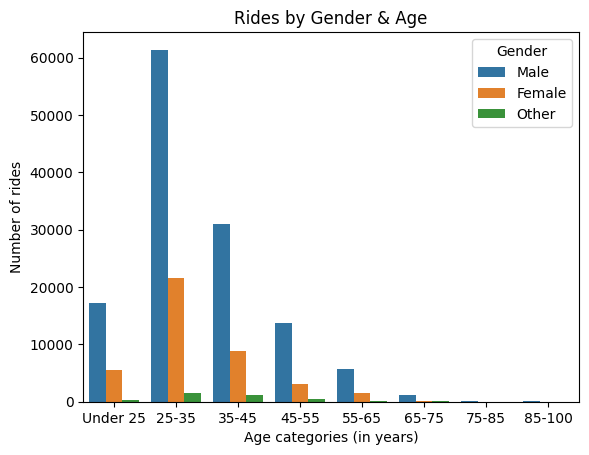

In [18]:
# Prepare data to create a clustered bar chart
# Define bins and labels for age 
bins = [0, 25, 35, 45, 55, 65, 75, 85, 100]
labels = ["Under 25", "25-35", "35-45", "45-55","55-65","65-75","75-85","85-100" ]

# Create a new variable 'Age_Category'
df["age_category"] = pd.cut(df["age"], bins=bins, labels=labels, right=False)

# Create a clustered bar chart
gender_order = ["Male", "Female", "Other"]

sns.countplot(data=df, x="age_category", hue="member_gender", hue_order=gender_order)
plt.legend(title="Gender")
plt.title("Rides by Gender & Age")
plt.xlabel("Age categories (in years)")
plt.ylabel("Number of rides");

## Ride length

Most of the bike rides were less than 10 minutes long. A relatively small number of bike rides were more than 30 minutes long.

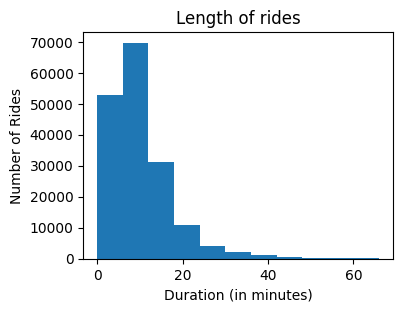

In [19]:
# Create a new figure
fig = plt.figure(figsize=(4,3))

# Add the dimensions of the axes.
ax = fig.add_axes([.125,.125,.775,.755])

# While the max duration is 1409 minutes, that is an outlier, and using a range of 1400 is not practical to visualize the figure, 
# hence the range was adapted to 70
bins = np.arange(0, 70, 6)
ax.hist(data=df_exp, x="duration_min", bins=bins)
ax.set_title("Length of rides")
ax.set_xlabel("Duration (in minutes)")
ax.set_ylabel("Number of Rides");

## Relationship between starting and ending station

Most bike rides started and ended in the same location. In the stations near the city center (stations id 1-100), it can also be observed that bikes were returned to locations proximate from where they were rented.

In [40]:
# Choose random sample due size of the dataset
np.random.seed(50)
sample = np.random.choice(df.shape[0], 200, replace = False)
df_subset = df.loc[sample]

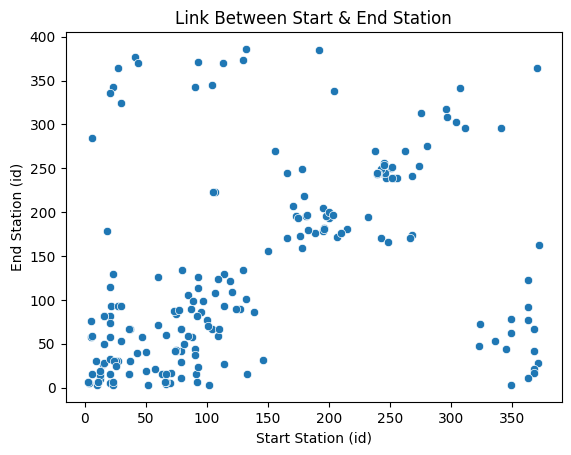

In [41]:
# Create scatter plot
sns.scatterplot(data=df_subset, x="start_station_id", y="end_station_id")
plt.title("Link Between Start & End Station")
plt.xlabel("Start Station (id)")
plt.ylabel("End Station (id)");